In [1]:
function Euler_vec(f,x0,t0,tf,h) #el x0 van a entrar las condiciones iniciales
    listt = t0:h:tf # nos va  mostrar los elementos en el intervalo como lista
    listx = [] 
    x = x0 
        for j in 1:length(listt)
            push!(listx,x)
            x = x + f(x,listt[j])*h       #el valor se va a actualizar y a almacenar en listx  
        end
    return listt, listx #nos devuelve el intervalo, y la lista de los x_vector
end
;

In [2]:
function Runge_Kutta_4(f,x0,t0,tf,h)
    listt=t0:h:tf
    listx=[x0[1]] # Posición
    listv=[x0[2]]   #Velocidad
    for i in 2:length(listt)
       #Pasos de R.k.4 
    k1=f(x0,listt[i-1])
    k2=f(x0+(h/2)*k1,listt[i-1]+h/2) 
    k3=f(x0+(h/2)*k2,listt[i-1]+h/2) 
    k4=f(x0+h*k3,listt[i]+h)
        
    x0=x0+(h/6)*(k1+2k2+2k3+k4)
        
        push!(listx,x0[1])
        push!(listv,x0[2])
    end
    return listt,listx,listv
end

Runge_Kutta_4 (generic function with 1 method)

__Ejercicio 1:__ Resolver oscilador amortiguado:
$$m \ddot x=-k x -b \dot x,$$
usando $m=k=b=1$ y $x_0=1$, $\dot x_0=0$.
$$\ddot x=- x - \dot x$$
Usen Euler Y Runge-Kutta orden 4, comparen las soluciones, es decir, grafiquen el espacio de fase para cada método y despues juntos.
__Nota:__ El método de Runge-Kutta esta dentro de la familia de métodos simplécticos, es decir, preserva el volumen en el espacio de fase, algo particularmente útil cuanto tenemos sistemas que conservan la energia, a diferencia de _Euler_ que no lo hace. Observen que al no haber cantidades conservadas para el oscilador amortiguado, Euler funcione mucho mejor que en el otro caso, pues el oscilador amortiguado no conserva el volumen del espacio de fase.

In [3]:
using PyPlot

In [4]:
#Tenemos la siguiente función, usando condiciones iniciales [1,0]
f(x,t)=[x[2],-x[1]-x[2]]

f (generic function with 1 method)

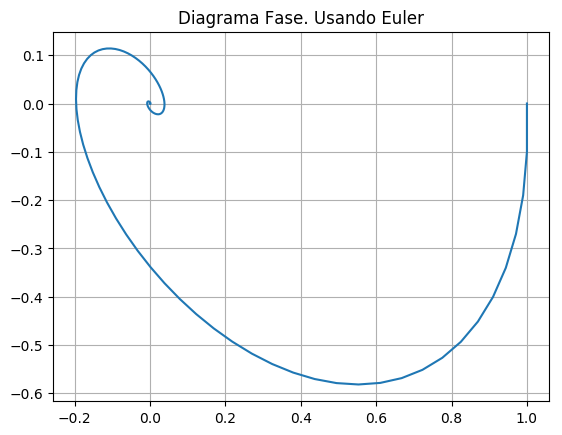

In [5]:
amortiguado_Euler=Euler_vec(f,[1.0,0.0],0.0,100.0,0.1);

#Diagrama fase, sustraemos para hacer plot

plot(map(x->x[1],amortiguado_Euler[2]),map(x->x[2],amortiguado_Euler[2]))
title("Diagrama Fase. Usando Euler")
grid("on")
;

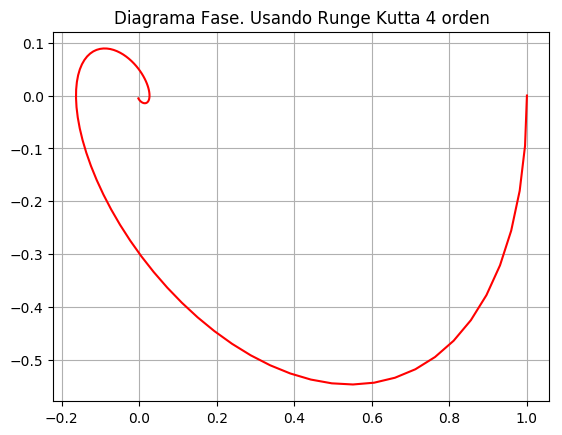

In [6]:
amortiguado2=Runge_Kutta_4(f,[1.0,0.0],0.0,10.0,0.1);

#Diagrama fase, sustraemos para hacer plot

plot(amortiguado2[2],amortiguado2[3],color="red")
title("Diagrama Fase. Usando Runge Kutta 4 orden")
grid("on")
;

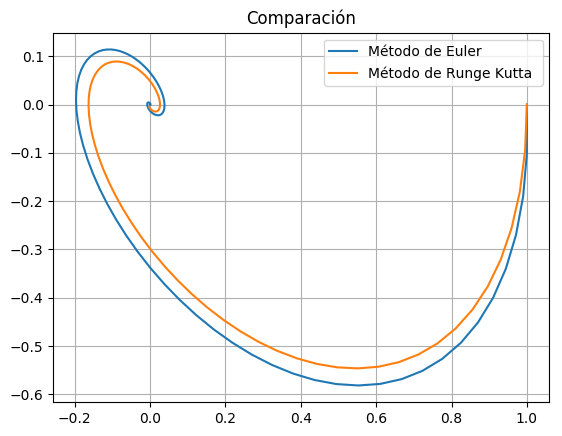

In [7]:
plot(map(x->x[1],amortiguado_Euler[2]),map(x->x[2],amortiguado_Euler[2]),label="Método de Euler")
plot(amortiguado2[2],amortiguado2[3], label="Método de Runge Kutta ")

title("Comparación")
grid("on"),legend()
;

__Ejercicio 2:__ Resolver el péndulo simple:
$$l \ddot\theta=-g \sin(\theta),$$
usando Runge-Kutta orden 4. Gráficar muchas condiciones iniciales (lo mas facil es que sean aleatorias) en el espacio de fase usando $l=g=1$. Ajuste el rango de la gráfica para que se centre cerca del cero para que se puedan observar los dos tipos de movimiento presentes. Coménte e interprete las soluciones.

La función resultante es $$\ddot\theta=- \sin(\theta),$$

In [8]:
f(x,t)=[x[2],-sin(x[1])];

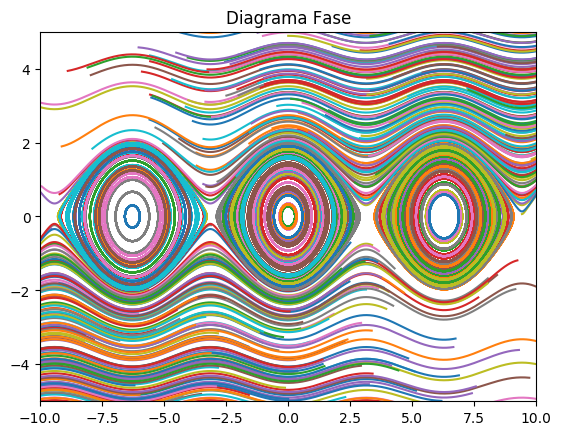

In [9]:
#Para obtener las condiciones iniciales aleatorias
for i in 1:600
    x0=(rand(2)-rand(2))*12  #Condiciones iniciales aleatorias
    aleatorias=Runge_Kutta_4(f,x0,-30.0,30.0,0.01)  
    plot(aleatorias[2],aleatorias[3])
    xlim(-10,10),ylim(-5,5)
    title("Diagrama Fase")
end


__Ejercicio 3:__Comprobar numéricamente (con Runge-Kutta orden $4$) que en el sistema: $$\frac{dx}{dt}=x^2-1,$$ hay dos puntos fijos, ubicados en $1$ y $-1$, compruebe además que el $1$ es un repulsor y el $-1$ un atractor. Para hacer esto necesitará graficar muchas condiciones iniciales, generelas aleatoriamente y gráfiquelas en el espacio $(x(t),t)$.

In [10]:
f(x,t)=[x[1]^2-1,0]

f (generic function with 1 method)

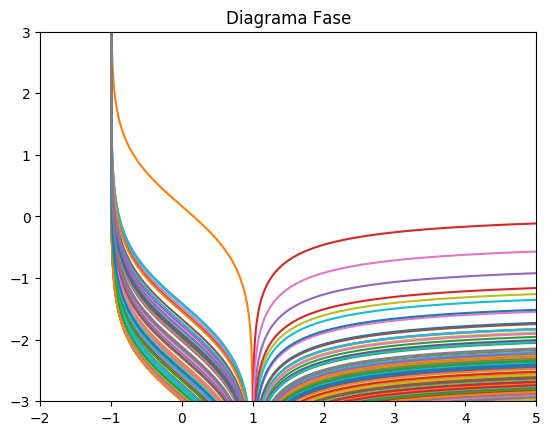

In [11]:
for i in 1:400
    s=5*(rand(1))
    pfijos=Runge_Kutta_4(f,[s[1],0.0],-3.0,3.0,0.01)
    plot(pfijos[2],pfijos[1])
    xlim(-2,5),ylim(-3,3)
    title("Diagrama Fase")
end
    

Se puede observar que el punto -1, es el atractor porque las líneas convergen a ese punto, mientras que el punto 1 es el repulsor.

__Ejercicio 4:__ También con Runge-Kutta orden $4, $Resuelva numéricamente el sistema:
$$\frac{dx}{dt}=x^2,$$
cual es el punto fijo único?, es un _atractor_ o un _repulsor_?. Utilice de igual forma muchas condiciones iniciales y gráfiquelas en el mismo espacio que en el ejercicio anterior.

In [12]:
f(x,t)=[x[1]^2,0]

f (generic function with 1 method)

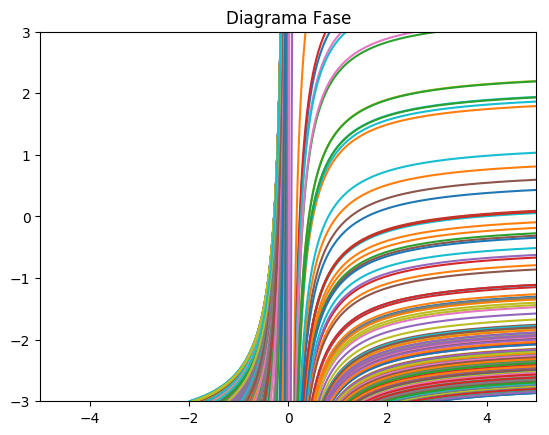

In [13]:
for i in 1:400
    s=5*(rand(1))-2.0
    pfijos=Runge_Kutta_4(f,[s[1],0.0],-3.0,3.0,0.01)
    plot(pfijos[2],pfijos[1])
    xlim(-5,5),ylim(-3,3)
    title("Diagrama Fase")
end

En este sistema existe un único punto fijo, el cual es el 0, pero no podemos decir que sea exclusivamente atractor o repulsor, ya que los valores a la izquierda converge pero los de a derecha, los positivos, divergen. Por lo tanto el punto 0 es punto silla.

__Ejercicio 5:__ Resolver con Runge-Kutta orden $4$ el sistema de ecuaciones: $$\frac{d\vec x}{dt}=\left(\begin{array}{cc} a & b \\ c & d \end{array}\right)\vec x,$$ donde $\vec x= \left(x(t),y(t)\right)^{\text{T}}.$ Grafique los espacios de fase tomando muchas condiciones iniciales aleatorias y fijando los rangos de los ejes alrededor del origen, de tal forma que se aprecie el compotamiento de las soluciones. Haga esto para los sistemas con:

* $a=b=1$, $c=d=0$ 
* $a=b=-1$, $c=d=0$
* $a=1$, $b=-2$, $c=d=0$
* $a=1$, $b=-0.5$, $c=d=0$
* $a=d=0$, $b=-c=1$
* $a=d=1$, $b=-c=1$
* $a=d=-1$, $b=-c=1$
* $a=d=-1$, $b=-c=-1$
* $a=b=1$, $b=4,c=-2$
* $a=b=d=-1$, $c=0$



$$ f(x,t) = ax[1]+bx[2] , cx[1]+dx[2]  $$

In [14]:
function fase(a,b,c,d)
    f(x,t)=[a*x[1]+b*x[2],c*x[1]+d*x[2]]
    for i in 1:400
        s=5*(rand(1))-2.0
        q=3*(rand(1))-1.2
        pfijos=Runge_Kutta_4(f,[s[1],q[1]],-3.0,3.0,0.01)
        plot(pfijos[2],pfijos[3])
        xlim(-3,3),ylim(-3,3)
        title("Diagrama Fase")
    end
end
;

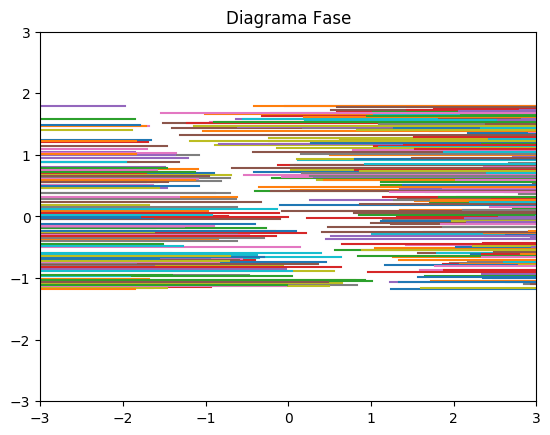

In [15]:
fase(1,1,0,0)

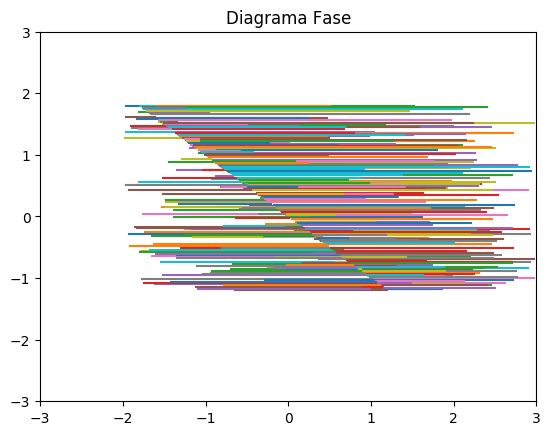

In [16]:
fase(-1,-1,0,0)

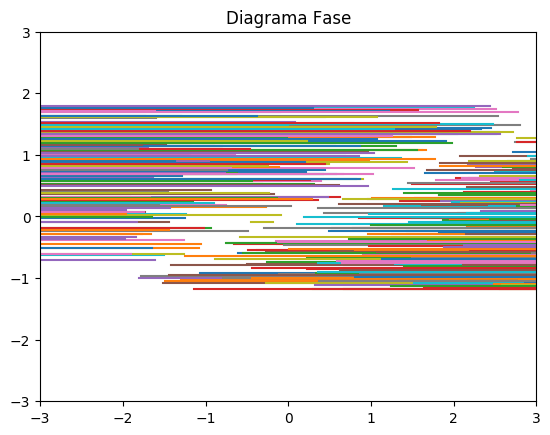

In [17]:
fase(1,-2,0,0)

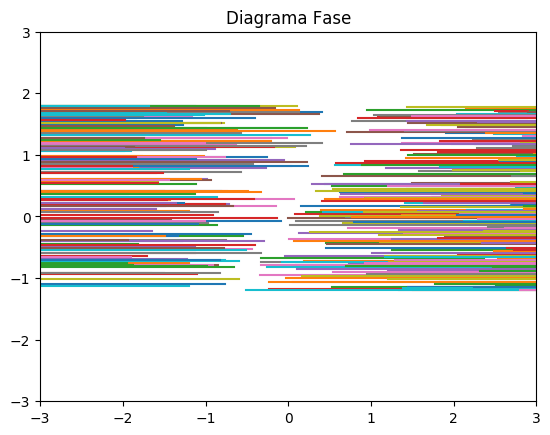

In [18]:
fase(1,-0.5,0,0)

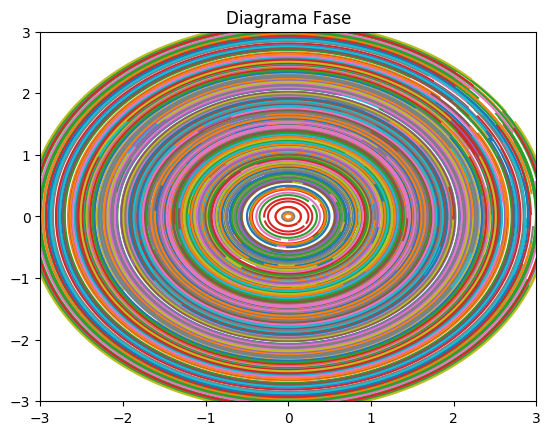

In [19]:
fase(0,1,-1,0)

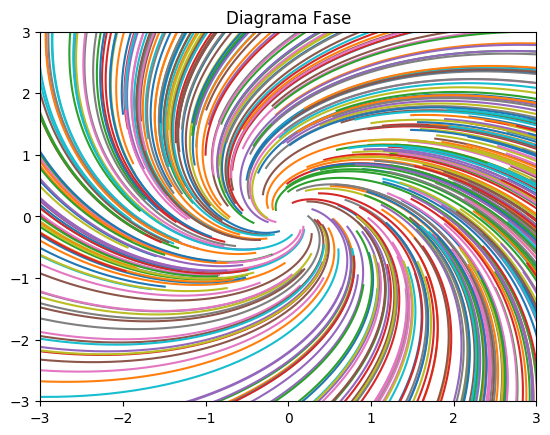

In [20]:
fase(1,1,-1,1)

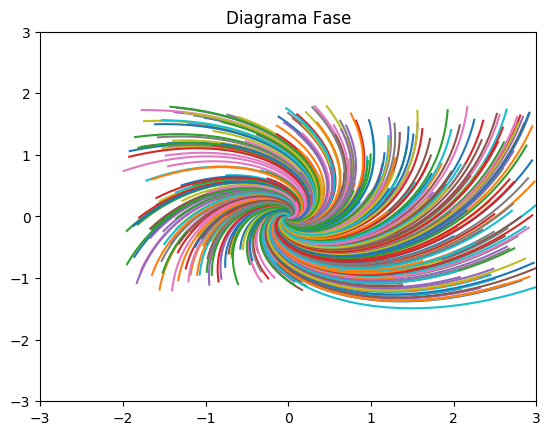

In [21]:
fase(-1,1,-1,-1)

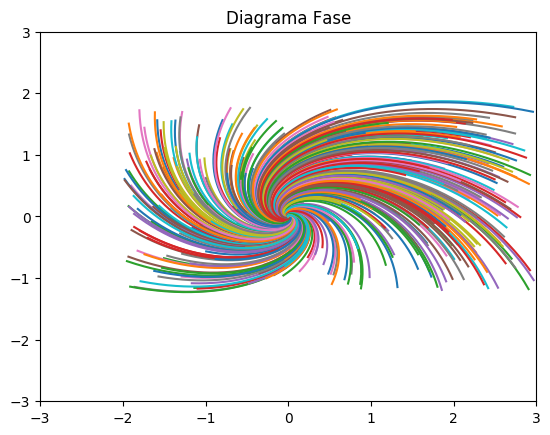

In [22]:
fase(-1,-1,1,-1)

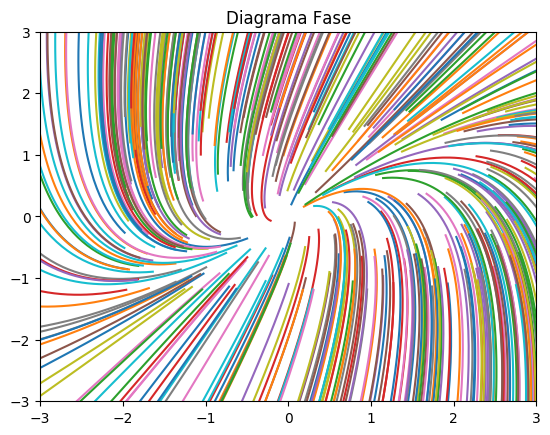

In [23]:
fase(1,1,-2,4)

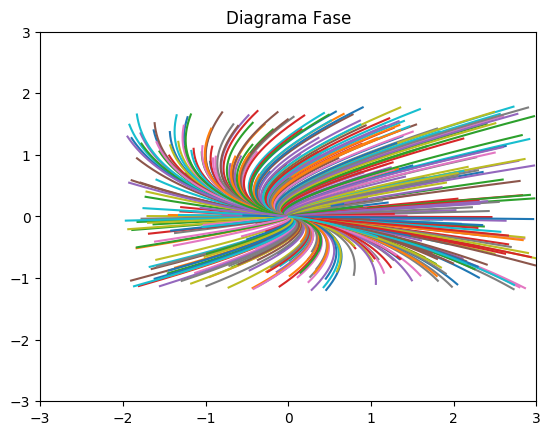

In [24]:
fase(-1,-1,0,-1)